# Problem Statement: Water Quality Prediction

**Dataset:** Utilizing the "Water Quality Testing.csv" dataset containing various parameters related to water quality such as pH levels, dissolved oxygen, turbidity, and other chemical characteristics.

**Objective:** Developing a machine learning model to predict the quality of water based on its chemical and physical attributes.

**Description:** Using the dataset containing water quality parameters, the goal is to build a predictive model that can classify or predict water quality based on the provided attributes. The model will leverage historical data to learn patterns and relationships between water quality parameters, aiming to accurately classify water samples into different quality categories.

## Importing Libraries and Loading the Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Water Quality Testing.csv')

In [3]:
df

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352
...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327
496,497,7.31,22.5,3.8,9.4,361
497,498,7.02,21.2,4.7,7.5,334
498,499,7.25,23.0,3.9,8.7,359


### Dropping Unwanted Columns for Streamlined Data Analysis

In [4]:
df.drop('Sample ID',axis=1,inplace=True)

### DataFrame Summary with Data Types, Non-Null Counts, and Memory Usage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pH                       500 non-null    float64
 1   Temperature (°C)         500 non-null    float64
 2   Turbidity (NTU)          500 non-null    float64
 3   Dissolved Oxygen (mg/L)  500 non-null    float64
 4   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 19.7 KB


### Descriptive Statistics for Numerical Columns.

In [6]:
df.describe()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.161140,22.054400,4.169400,8.382200,344.362000
std,0.107531,0.903123,0.397492,0.822396,13.038672
min,6.830000,20.300000,3.100000,6.000000,316.000000
25%,7.080000,21.200000,3.800000,7.800000,333.000000
50%,7.160000,22.200000,4.200000,8.400000,344.000000
75%,7.250000,22.900000,4.500000,9.100000,355.000000
max,7.480000,23.600000,5.100000,9.900000,370.000000


After calculating the summary statistics for the numeric columns in the dataset, we can observe the following:

The count of values in each column indicates that we have data for a certain number of samples.

The mean value gives us an idea of the average or central tendency of the numeric columns.

The standard deviation provides a measure of the dispersion or variability in the data.

The minimum and maximum values help us identify the range of values for each column.

The quartiles give us information about the distribution and spread of the data.

In [7]:
#independent features
x=df.iloc[:,:]

In [8]:
x

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,7.25,23.1,4.5,7.8,342
1,7.11,22.3,5.1,6.2,335
2,7.03,21.5,3.9,8.3,356
3,7.38,22.9,3.2,9.5,327
4,7.45,20.7,3.8,8.1,352
...,...,...,...,...,...
495,7.01,20.8,4.6,7.1,327
496,7.31,22.5,3.8,9.4,361
497,7.02,21.2,4.7,7.5,334
498,7.25,23.0,3.9,8.7,359


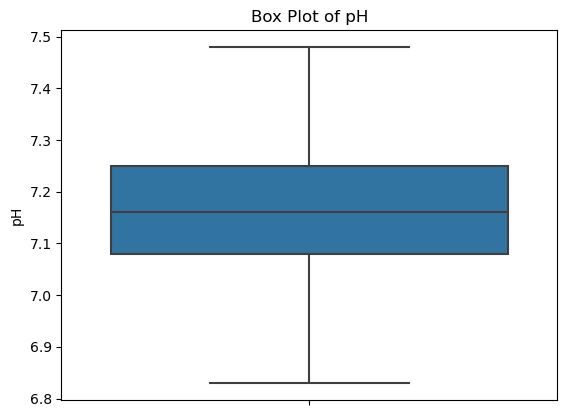

In [10]:
sns.boxplot(data=df,y='pH')
plt.title('Box Plot of pH')
plt.show()

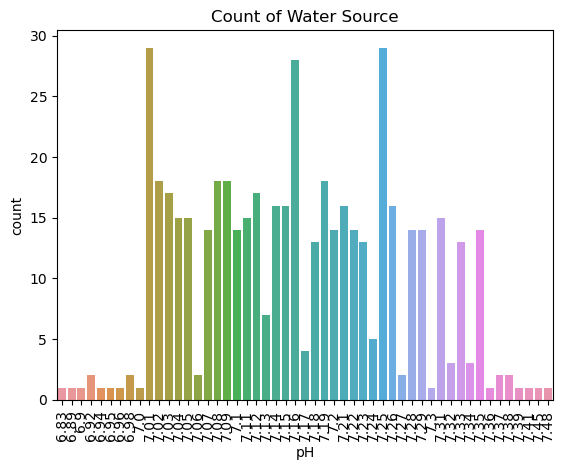

In [11]:
sns.countplot(data=df,x='pH')
plt.title('Count of Water Source')
plt.xticks(rotation=90)
plt.show()

### Exploring Relationships Between Numeric Columns.

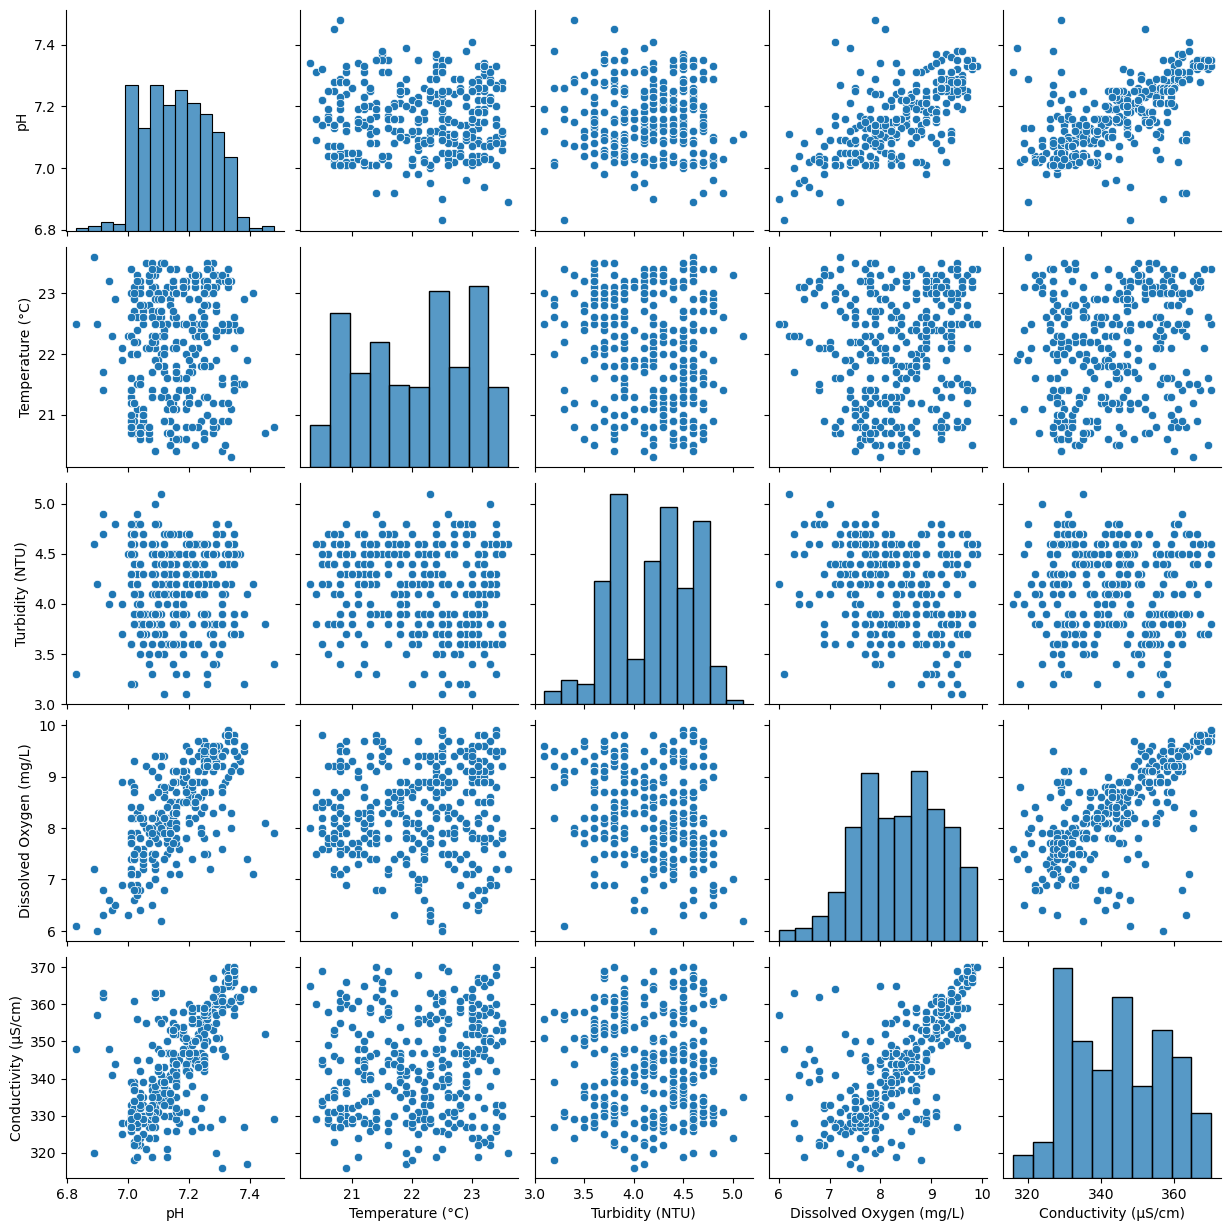

In [12]:
sns.pairplot(df)

### Analyzing Correlation Between Data.

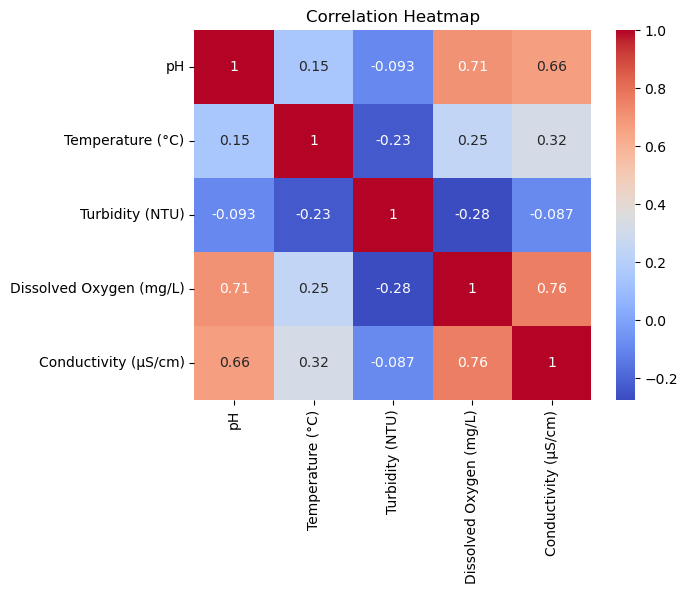

In [13]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Data Preprocessing: Cleaning and Transforming Raw Data for Analysis.

In [16]:
df.isna().sum()

pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64

In [17]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


### Clustering process

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [19]:
wcss #within cluster sum of square
'''WCSS measures the sum of squared distances of data points within each cluster to their respective centroids.'''

'WCSS measures the sum of squared distances of data points within each cluster to their respective centroids.'

To create an "elbow plot" for determining the optimal number of clusters (K value).

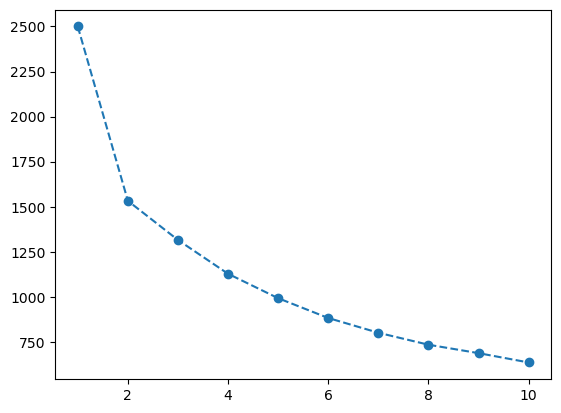

In [20]:
plt.plot(range(1,11),wcss,'o--')
plt.show()

### Applying KMeans Clustering.

In [21]:
kmeans=KMeans(n_clusters=2,random_state=1)
ylabel=kmeans.fit_predict(x)
df['ymeans']=ylabel


In [22]:
df

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),ymeans
0,7.25,23.1,4.5,7.8,342,1
1,7.11,22.3,5.1,6.2,335,0
2,7.03,21.5,3.9,8.3,356,0
3,7.38,22.9,3.2,9.5,327,1
4,7.45,20.7,3.8,8.1,352,1
...,...,...,...,...,...,...
495,7.01,20.8,4.6,7.1,327,0
496,7.31,22.5,3.8,9.4,361,1
497,7.02,21.2,4.7,7.5,334,0
498,7.25,23.0,3.9,8.7,359,1


 To create a scatter plot based on the data points and their assigned cluster labels 

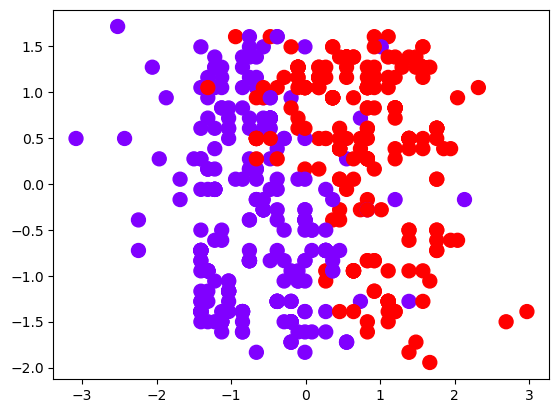

In [23]:
plt.scatter(x[:,0],x[:,1],c=ylabel,s=100,cmap='rainbow')


In [24]:
df['ymeans'].value_counts()

0    264
1    236
Name: ymeans, dtype: int64

In [25]:
y=df.iloc[:,-1]

In [26]:
y

0      1
1      0
2      0
3      1
4      1
      ..
495    0
496    1
497    0
498    1
499    0
Name: ymeans, Length: 500, dtype: int32

In [27]:
x=df.iloc[:,:-1]

In [28]:
x

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,7.25,23.1,4.5,7.8,342
1,7.11,22.3,5.1,6.2,335
2,7.03,21.5,3.9,8.3,356
3,7.38,22.9,3.2,9.5,327
4,7.45,20.7,3.8,8.1,352
...,...,...,...,...,...
495,7.01,20.8,4.6,7.1,327
496,7.31,22.5,3.8,9.4,361
497,7.02,21.2,4.7,7.5,334
498,7.25,23.0,3.9,8.7,359


### Model Selection: Choosing the Optimal Machine Learning Model.

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [31]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f'training accuracy:{train}\nTesting accuracy:{test}')
    print(classification_report(ytest,ypred))
    return model

In [32]:
mymodel(KNeighborsClassifier())

training accuracy:0.95
Testing accuracy:0.97
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.98      0.96      0.97        46

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



KNeighborsClassifier()

## Conclusion:

**Successfully developed a predictive model with a high accuracy of 97% in classifying water quality based on chemical and physical parameters.
The deployed model can facilitate quick and accurate assessment of water quality, aiding in proactive measures to maintain or improve water standards for various purposes, such as drinking water supply or environmental monitoring.**